# Exemple de base

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline


In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text = "The moon landing was faked and never happened."
labels = ["Fake News", "True News"]
result = classifier(text, candidate_labels=labels)

In [ ]:
result

{'sequence': 'The moon landing was faked and never happened.',
 'labels': ['Fake News', 'True News'],
 'scores': [0.9784344434738159, 0.02156561240553856]}

# Exemple avec + de data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


In [ ]:
texts = [
    "Obama was US president",
    "France is located in Europe",
    "red sea doesn't exist",
    "Climate change is a hoax created by the Chinese government.",
    "The Earth is flat and surrounded by an ice wall.",
    "Some people argue that the moon landing happened, but others believe it was a hoax.",
    "AI will replace God"
]

In [ ]:
labels = ["Fake News", "True News"]
results = [classifier(text, candidate_labels=labels) for text in texts]

In [ ]:
df = pd.DataFrame({
    "Texte": [res['sequence'] for res in results],
    "Fake News Score": [dict(zip(res['labels'], res['scores']))["Fake News"] for res in results],
    "True News Score": [dict(zip(res['labels'], res['scores']))["True News"] for res in results]
})

df

,Texte,Fake News Score,True News Score
0,Obama was US president,0.072748,0.927252
1,France is located in Europe,0.111720,0.888280
2,red sea doesn't exist,0.725260,0.274740
3,Climate change is a hoax created by the Chines...,0.970700,0.029300
4,The Earth is flat and surrounded by an ice wall.,0.559348,0.440652
5,Some people argue that the moon landing happen...,0.613941,0.386059
6,AI will replace God,0.141559,0.858441


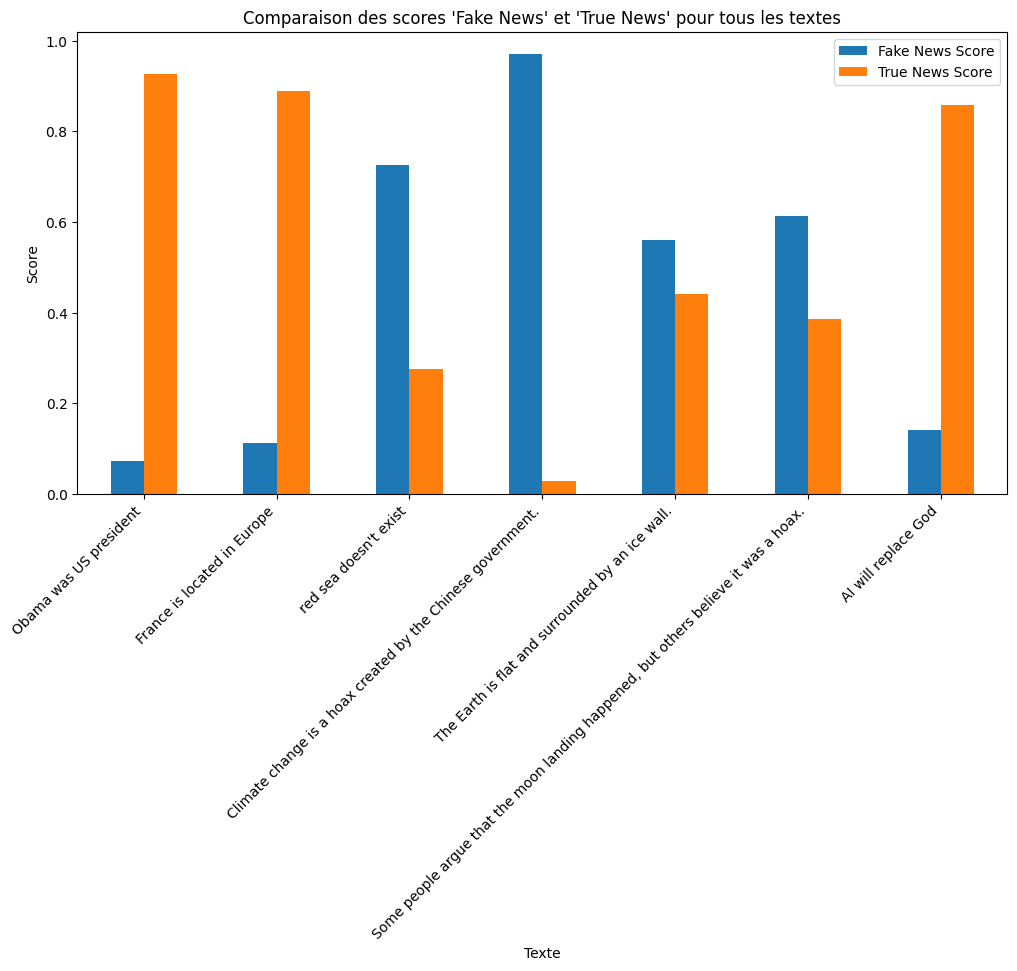

In [ ]:
df.plot(kind='bar', x='Texte', y=['Fake News Score', 'True News Score'], figsize=(12, 6))
plt.title("Comparaison des scores 'Fake News' et 'True News' pour tous les textes")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.show()

# Changeons de modèle

In [ ]:
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")
results = [classifier(text, candidate_labels=labels) for text in texts]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue:

In [ ]:
df = pd.DataFrame({
    "Texte": [res['sequence'] for res in results],
    "Fake News Score": [dict(zip(res['labels'], res['scores']))["Fake News"] for res in results],
    "True News Score": [dict(zip(res['labels'], res['scores']))["True News"] for res in results]
})



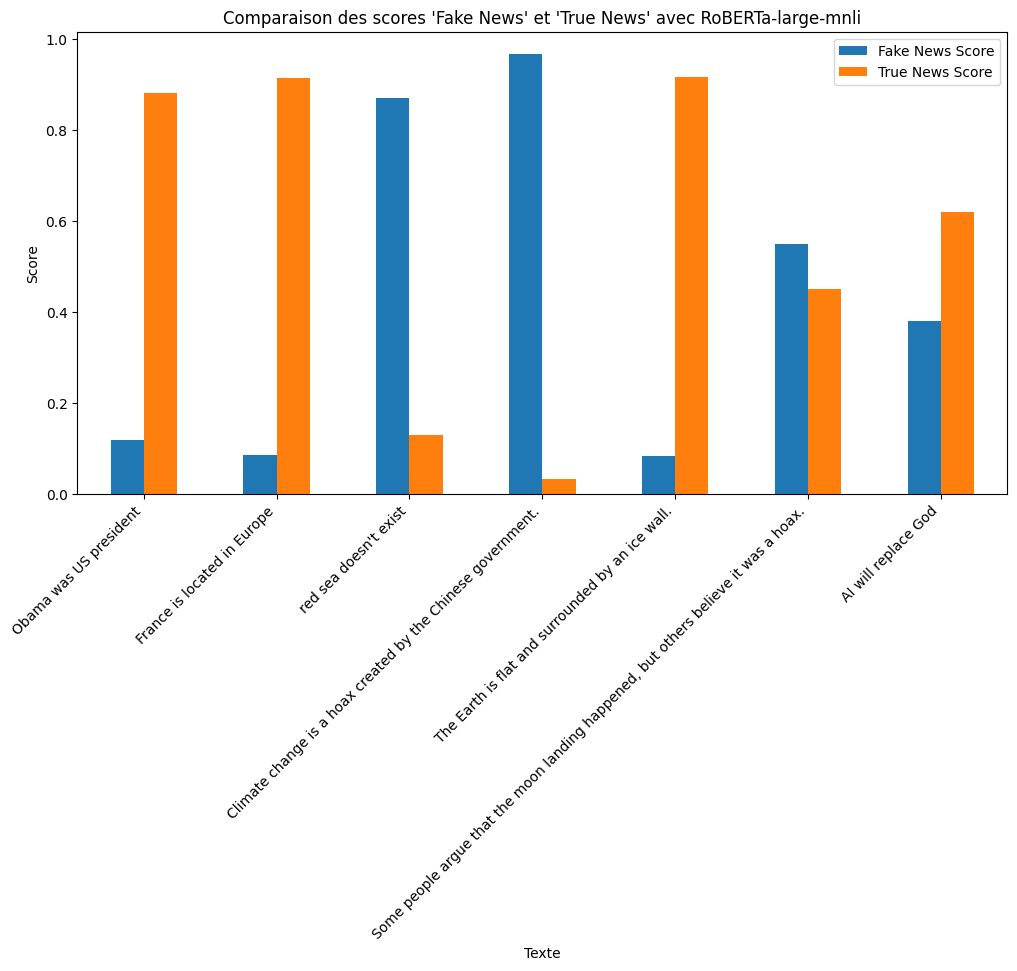

In [ ]:
df.plot(kind='bar', x='Texte', y=['Fake News Score', 'True News Score'], figsize=(12, 6))
plt.title("Comparaison des scores 'Fake News' et 'True News' avec RoBERTa-large-mnli")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.show()

# Itération super simple

In [ ]:
classifier = pipeline("zero-shot-classification", model="roberta-large-mnli")
results = [classifier(text, candidate_labels=labels) for text in texts]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue:

In [ ]:
results

[{'sequence': 'Obama was US president',
  'labels': ['True News', 'Fake News'],
  'scores': [0.8822354078292847, 0.11776459217071533]},
 {'sequence': 'France is located in Europe',
  'labels': ['True News', 'Fake News'],
  'scores': [0.9146381616592407, 0.08536183089017868]},
 {'sequence': "red sea doesn't exist",
  'labels': ['Fake News', 'True News'],
  'scores': [0.8705114722251892, 0.12948855757713318]},
 {'sequence': 'Climate change is a hoax created by the Chinese government.',
  'labels': ['Fake News', 'True News'],
  'scores': [0.9675837159156799, 0.03241628408432007]},
 {'sequence': 'The Earth is flat and surrounded by an ice wall.',
  'labels': ['True News', 'Fake News'],
  'scores': [0.9172235727310181, 0.08277641981840134]},
 {'sequence': 'Some people argue that the moon landing happened, but others believe it was a hoax.',
  'labels': ['Fake News', 'True News'],
  'scores': [0.5488500595092773, 0.45114991068840027]},
 {'sequence': 'AI will replace God',
  'labels': ['True 

# Pipeline de Transformers pour comparer

In [ ]:
models = {
    "BART-large-mnli": pipeline("zero-shot-classification", model="facebook/bart-large-mnli"),
    "RoBERTa-large-mnli": pipeline("zero-shot-classification", model="roberta-large-mnli"),
    "DeBERTa-large-mnli": pipeline("zero-shot-classification", model="microsoft/deberta-large-mnli")
}


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertFo

In [ ]:
texts = [
    "Obama was US president",
    "France is located in Europe",
    "red sea doesn't exist",
    "Climate change is a hoax created by the Chinese government.",
    "The Earth is flat and surrounded by an ice wall.",
    "Some people argue that the moon landing happened, but others believe it was a hoax.",
    "AI will replace God"
]

labels = ["Fake News", "True News"]

In [ ]:
results = []
for model_name, classifier in models.items():
    model_results = [classifier(text, candidate_labels=labels) for text in texts]
    for res in model_results:
        results.append({
            "Modèle": model_name,
            "Texte": res['sequence'],
            "Fake News Score": dict(zip(res['labels'], res['scores']))["Fake News"],
            "True News Score": dict(zip(res['labels'], res['scores']))["True News"]
        })

df = pd.DataFrame(results)
df

,Modèle,Texte,Fake News Score,True News Score
0,BART-large-mnli,Obama was US president,0.072748,0.927252
1,BART-large-mnli,France is located in Europe,0.111720,0.888280
2,BART-large-mnli,red sea doesn't exist,0.725260,0.274740
3,BART-large-mnli,Climate change is a hoax created by the Chines...,0.970700,0.029300
4,BART-large-mnli,The Earth is flat and surrounded by an ice wall.,0.559348,0.440652
5,BART-large-mnli,Some people argue that the moon landing happen...,0.613941,0.386059
6,BART-large-mnli,AI will replace God,0.141559,0.858441
7,RoBERTa-large-mnli,Obama was US president,0.117765,0.882235
8,RoBERTa-large-mnli,France is located in Europe,0.085362,0.914638
9,RoBERTa-large-mnli,red sea doesn't exist,0.870511,0.129489


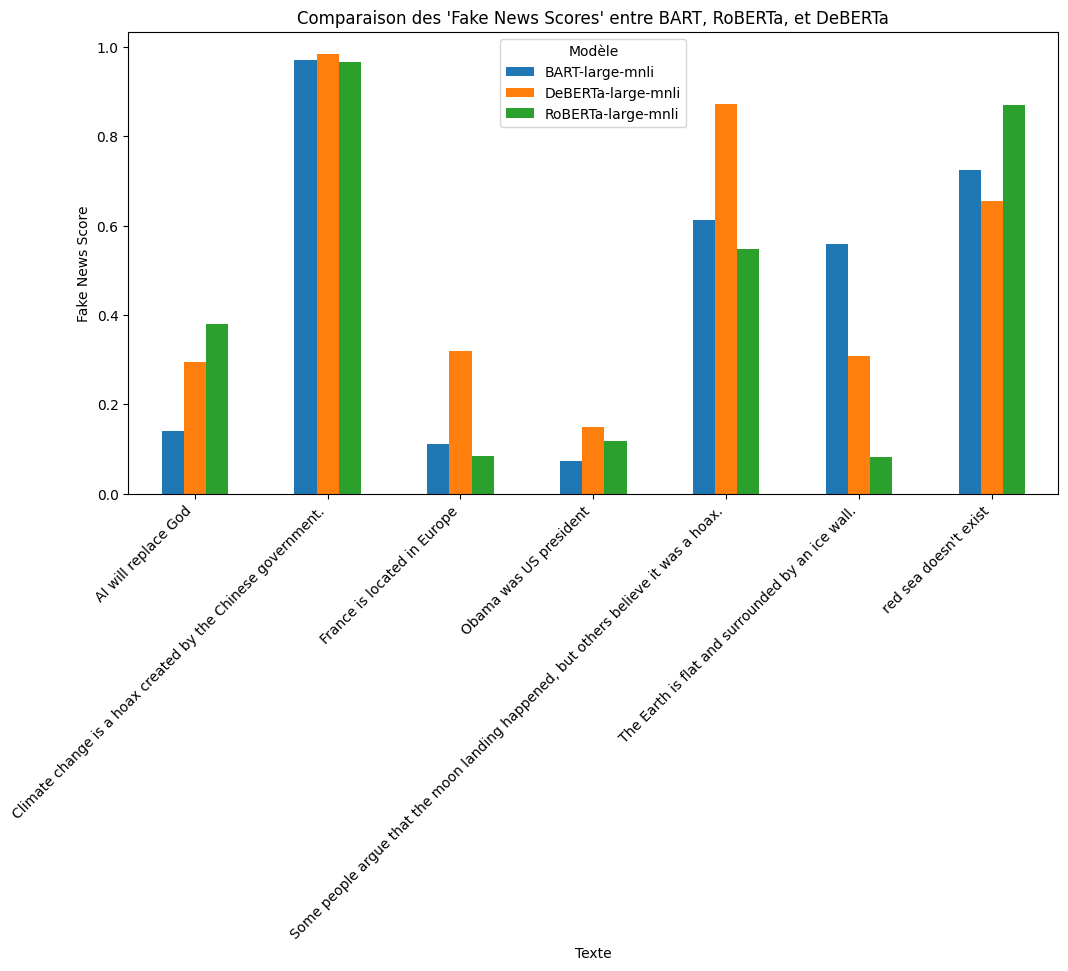

In [ ]:
df.pivot(index="Texte", columns="Modèle", values="Fake News Score").plot(kind='bar', figsize=(12, 6))
plt.title("Comparaison des 'Fake News Scores' entre BART, RoBERTa, et DeBERTa")
plt.ylabel("Fake News Score")
plt.xticks(rotation=45, ha='right')
plt.show()

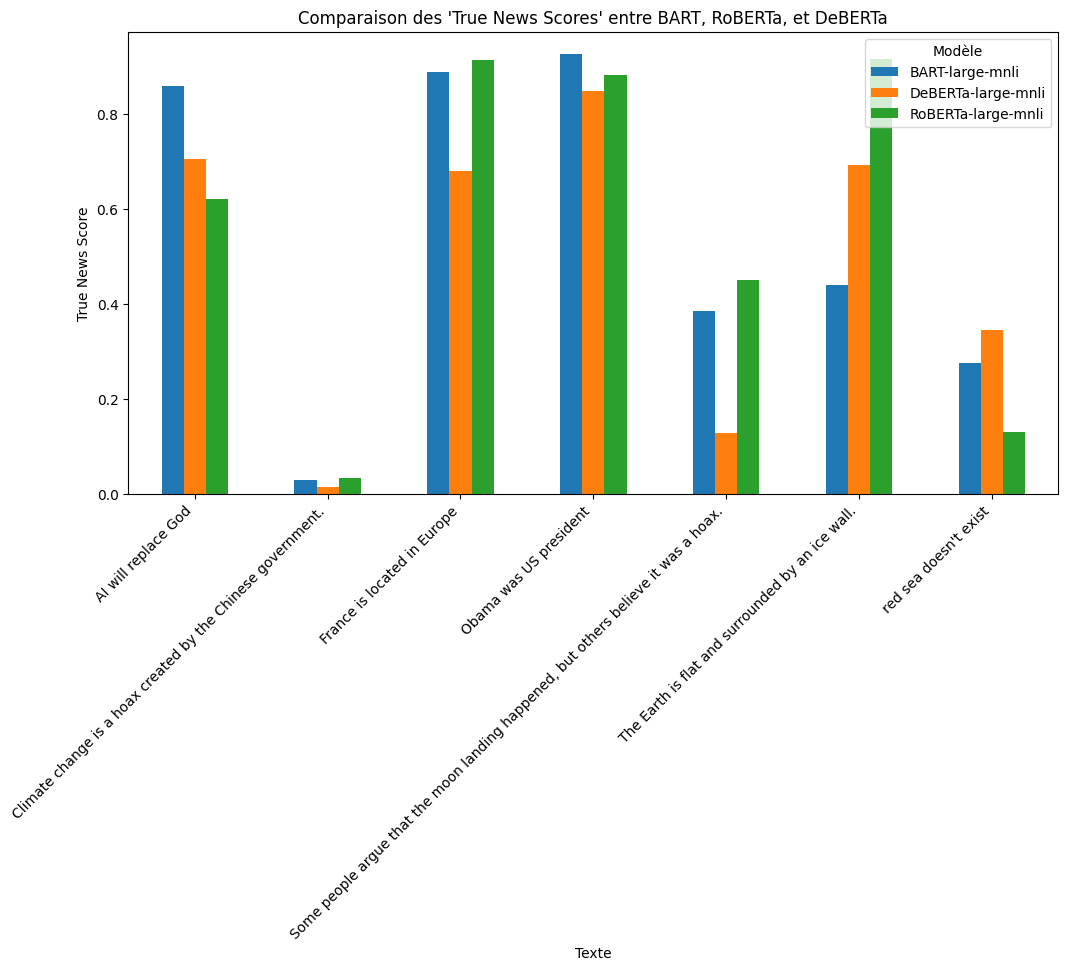

In [ ]:
df.pivot(index="Texte", columns="Modèle", values="True News Score").plot(kind='bar', figsize=(12, 6))
plt.title("Comparaison des 'True News Scores' entre BART, RoBERTa, et DeBERTa")
plt.ylabel("True News Score")
plt.xticks(rotation=45, ha='right')
plt.show()